In [2]:
!pip install psycopg2-binary


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [34]:
import psycopg2
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.patches as mpatches
import gc
from pylab import rcParams

In [4]:
def print_psycopg2_exception(err):
    err_type, err_obj, traceback = sys.exc_info()
    line_num = traceback.tb_lineno
    print ("\npsycopg2 ERROR:", err, "on line number:", line_num)
    print ("psycopg2 traceback:", traceback, "-- type:", err_type)
    print ("\nextensions.Diagnostics:", err.diag)
    print ("pgerror:", err.pgerror)
    print ("pgcode:", err.pgcode, "\n")

In [5]:
conn = psycopg2.connect(database="YOUR_DATABASE", user='<YOUR_USER>', password='<YOUR_PASSWORD>', 
                        host='<DATABASE_HOST>', port= '5432')
cursor = conn.cursor()
cursor.execute("select now()")
data = cursor.fetchone()
print("Server Date: ", data)
print("\n")

Server Date:  (datetime.datetime(2023, 8, 1, 19, 34, 44, 696793, tzinfo=datetime.timezone.utc),)




In [29]:
# del topics_df
# del topic_df
gc.collect()

94

In [31]:
topic_query = "SELECT TO_CHAR(message_date, 'YYYY-MM') month_year, primary_topic, COUNT(*) msg_cnt FROM ml_extract_track "
topic_query = topic_query + "WHERE extract_status = 'C' AND message_date > '2021-11-30' AND message_date < '2023-07-01' AND "
topic_query = topic_query + "primary_topic IS NOT NULL "
topic_query = topic_query + "GROUP BY TO_CHAR(message_date, 'YYYY-MM'), primary_topic ORDER BY 1; " 
print(topic_query)

try:
    cursor.execute(topic_query)
    topic_data = cursor.fetchall()
    
except Exception as err:
    print_psycopg2_exception(err)
    conn.rollback()

topics_df = pd.DataFrame(topic_data, columns=['month_year', 'primary_topic', 'msg_cnt']).set_index('month_year')
print(topics_df)

SELECT TO_CHAR(message_date, 'YYYY-MM') month_year, primary_topic, COUNT(*) msg_cnt FROM ml_extract_track WHERE extract_status = 'C' AND message_date > '2021-11-30' AND message_date < '2023-07-01' AND primary_topic IS NOT NULL GROUP BY TO_CHAR(message_date, 'YYYY-MM'), primary_topic ORDER BY 1; 
           primary_topic  msg_cnt
month_year                       
2021-12                1       37
2021-12                2       39
2021-12                3       20
2021-12                4       13
2021-12                5       18
...                  ...      ...
2023-06                4       15
2023-06                5       15
2023-06                6       15
2023-06                7       17
2023-06                8       10

[151 rows x 2 columns]


In [32]:
topic_no = '1'
topic_df = topics_df[topics_df.primary_topic == topic_no]
topic_df.drop(columns=["primary_topic"], inplace=True)
topic_df.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,msg_cnt
month_year,
2021-12,37
2022-01,144
2022-02,112
2022-03,248
2022-04,121


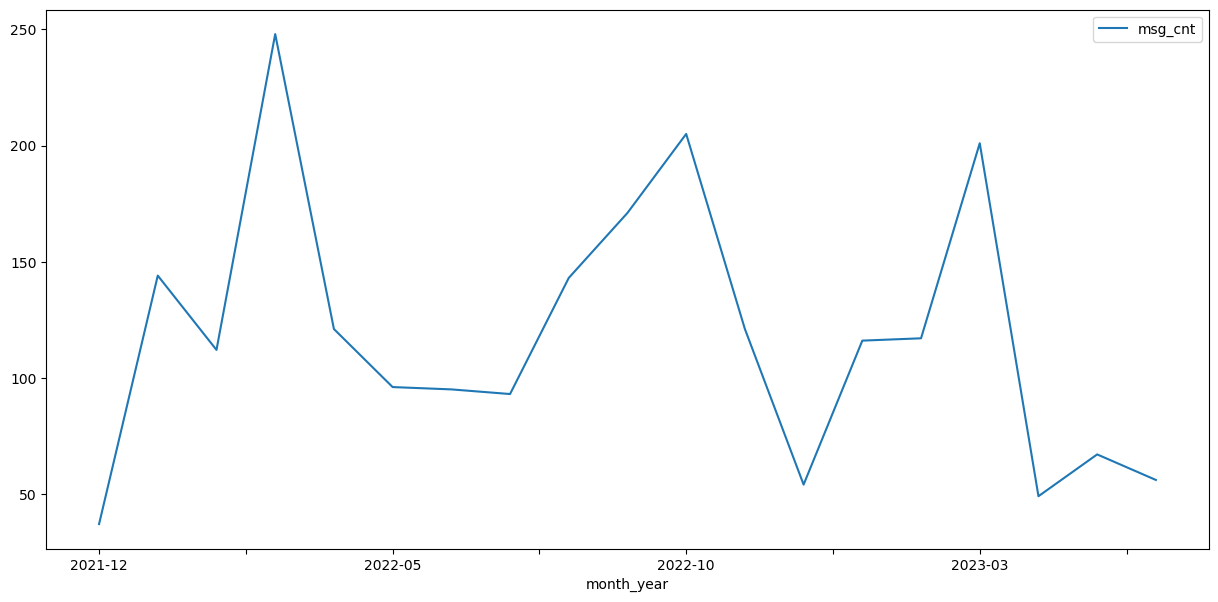

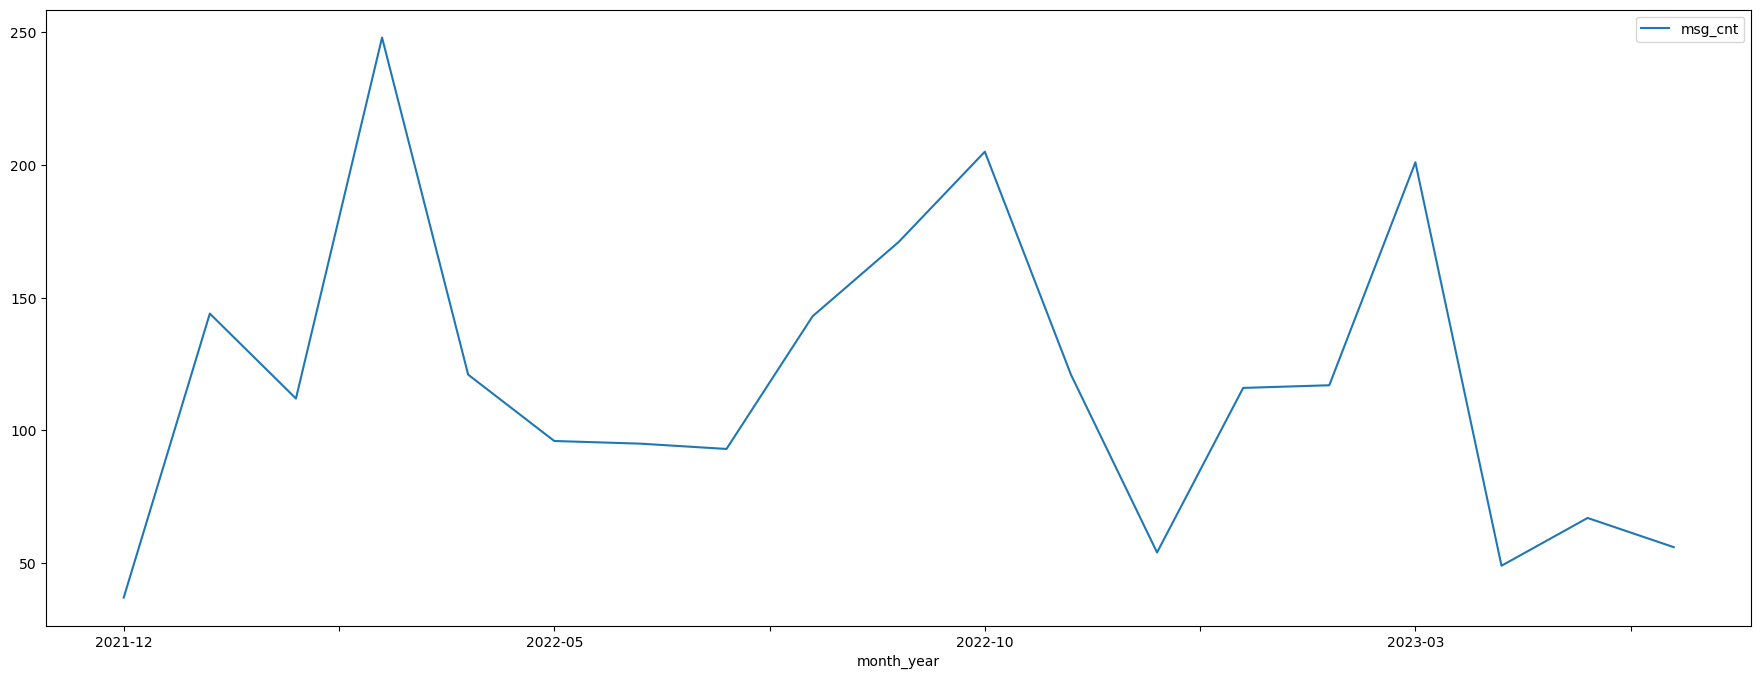

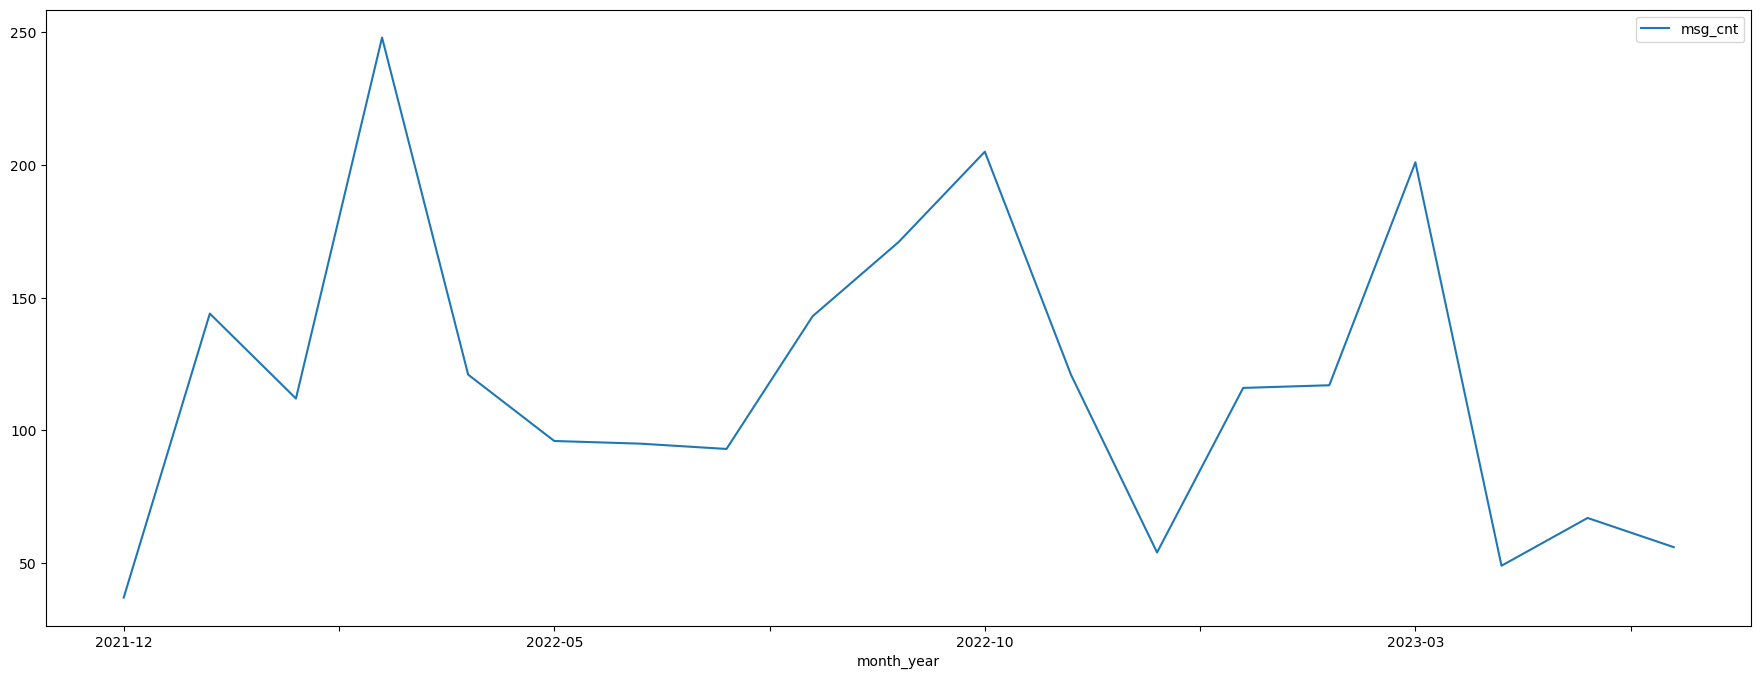

In [37]:
rcParams['figure.figsize'] = 22, 8
topic_df.plot()
plt.show()